In [34]:

# Inteligencia Artificial y Redes Neuronales 
# Josue Miguel Pérez 
# Matrícula: 1966557 IMTC
# Día: LMV Hora: N1

In [35]:
# Entrenar una red neuronal simple con el conjunto de datos mnist

In [36]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.12.0


In [37]:
# importamos el conjunto de datos mnist

In [40]:
mnist = keras.datasets.mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [41]:
# asignamos las clases

In [42]:
class_names= ['cero', 'uno', 'dos', 'tres', 'cuatro', 'cinco', 'seis', 'siete', 'ocho', 'nueve']

In [43]:
train_images.shape

(60000, 28, 28)

In [44]:
len(train_labels)

60000

In [45]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [46]:
test_images.shape

(10000, 28, 28)

In [47]:
len(test_labels)

10000

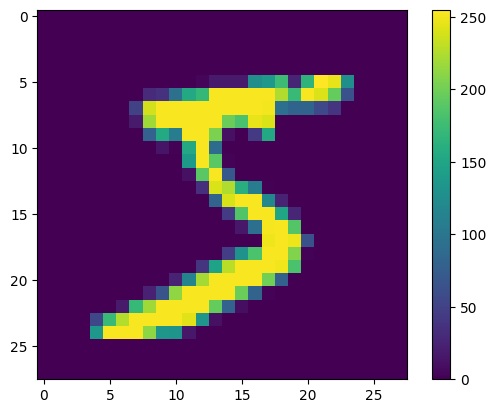

In [48]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [49]:
train_images = train_images / 255.0

test_images = test_images / 255.0

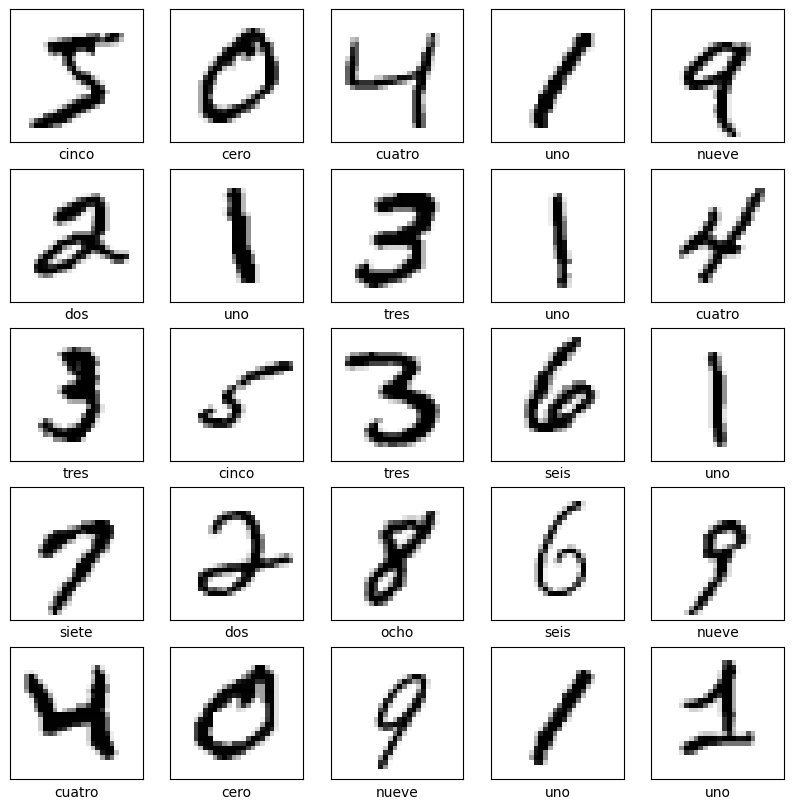

In [50]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [51]:
# Construimos el modelo

In [52]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [53]:
# lo compilamos

In [54]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [55]:
# ahora podemos entrenarlo

In [56]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2500 - accuracy: 0.9294
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1095 - accuracy: 0.9678
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0763 - accuracy: 0.9770
Epoch 4/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.0575 - accuracy: 0.9825
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0452 - accuracy: 0.9861
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0348 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0279 - accuracy: 0.9913
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0233 - accuracy: 0.9930
Epoch 9/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0194 - accuracy: 0.9943
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.016

In [57]:
# hacemos la prueba de exactitud del modelo

In [58]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.0800 - accuracy: 0.9778 - 697ms/epoch - 2ms/step

Test accuracy: 0.9778000116348267


In [59]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [60]:
predictions[0]

array([2.9792595e-11, 7.9415068e-12, 6.0077284e-08, 3.7208254e-06,
       7.3169137e-15, 2.1642499e-11, 5.6551321e-14, 9.9999613e-01,
       1.5117879e-09, 1.8646107e-08], dtype=float32)

In [61]:
np.argmax(predictions[0])

7

In [62]:
test_labels[0]

7

In [63]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [64]:
# podemos a empezar a hacer diferentes pruebas de predicciones

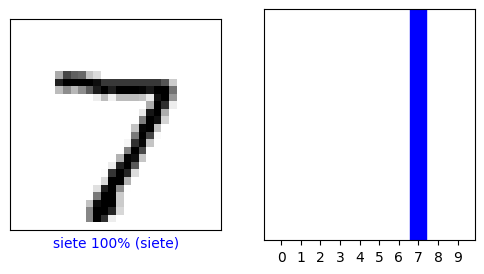

In [65]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

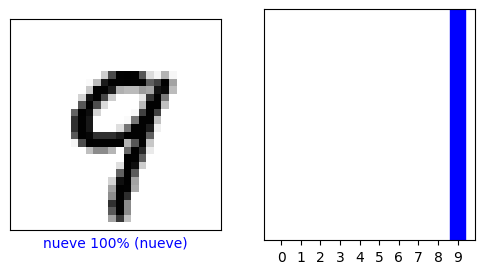

In [66]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

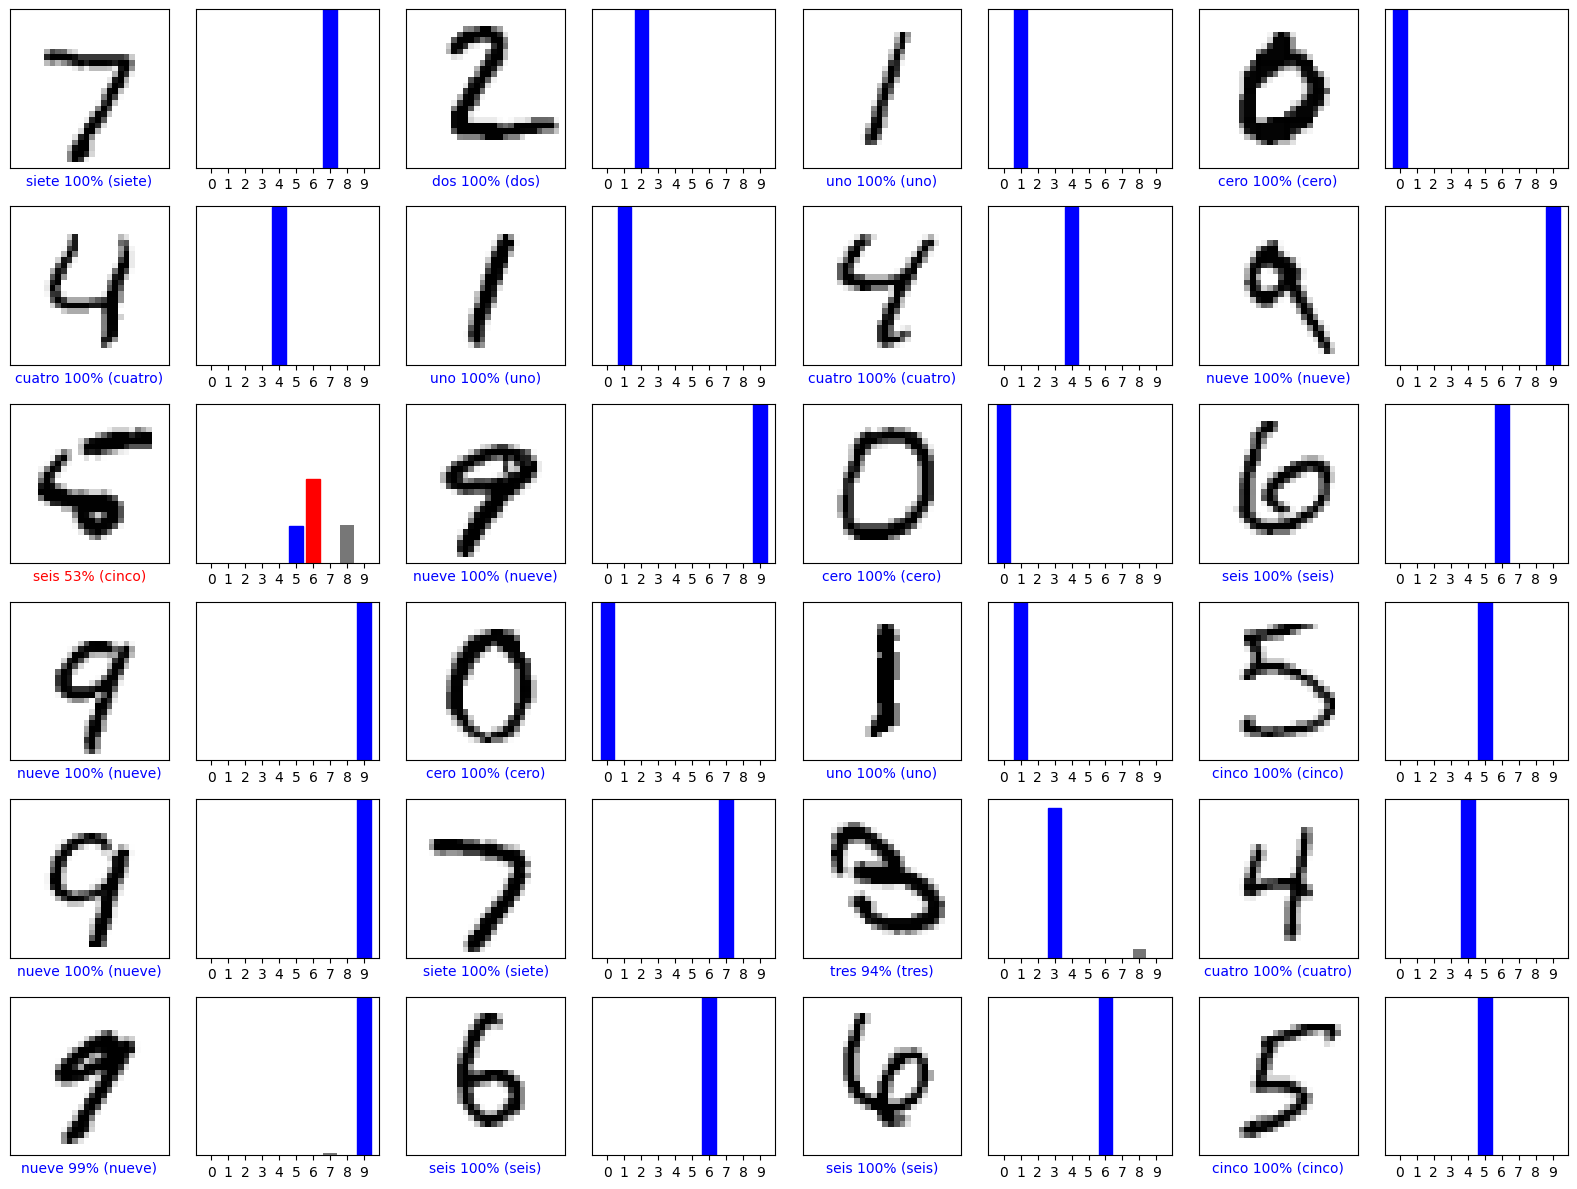

In [67]:
# Graficamos x número de imágenes con su respectiva prediccion.
# las predicciones correctas se ven en color azul 
num_rows = 6
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [68]:
# Tomamos una sola imagen del grupo de pruebas.
img = test_images[1]

print(img.shape)

(28, 28)


In [69]:
# agregamos la imagen a un arreglo dónde solo está esa imagen .
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [70]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 26ms/step
[[1.7238598e-10 1.8257814e-09 1.0000000e+00 2.3944643e-11 5.6876953e-28
  1.0909134e-11 8.5546284e-12 3.4331747e-24 3.5691354e-08 4.1820248e-19]]


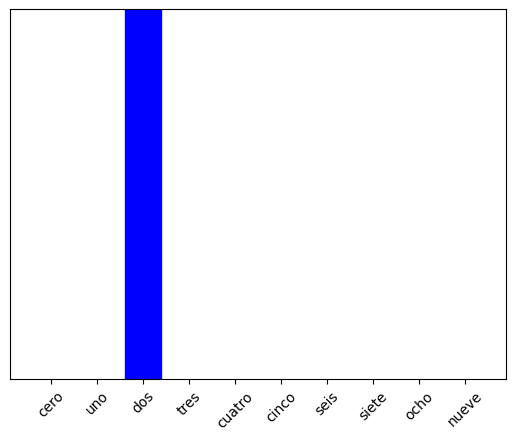

In [71]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [72]:
np.argmax(predictions_single[0])

2

In [73]:
# Vemos que en ambas predicciones se corrobora que si es la misma prediccion